**Regression & Its Evaluation | Assignment**

### Question 1: What is Simple Linear Regression?

**Answer:**  
Simple Linear Regression is a statistical method used to model the relationship between one independent variable (X) and one dependent variable (Y).  

It follows the equation:  
Y = β₀ + β₁X + ε  

Where β₀ is the intercept, β₁ is the slope, and ε is the error term.  
It is commonly used for prediction and understanding relationships between variables.


### Question 2: What are the key assumptions of Simple Linear Regression?

**Answer:**  
1. Linearity - Relationship between X and Y should be linear  
2. Independence - Observations must be independent  
3. Homoscedasticity - Constant variance of residuals  
4. Normality - Residuals should be normally distributed  
5. No multicollinearity - Important for multiple regression


### Question 3: What is heteroscedasticity, and why is it important?

**Answer:**  
Heteroscedasticity occurs when the variance of residuals is not constant across all values of the independent variable.  

It is important to address because:
- It reduces model accuracy  
- Makes hypothesis testing unreliable  
- Causes biased standard errors  
- Leads to poor predictions  

It can be handled using transformations or robust regression.


### Question 4: What is Multiple Linear Regression?

**Answer:**  
Multiple Linear Regression is used when more than one independent variable is used to predict a dependent variable.  

Formula:  
Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε  

Example: Predicting house price using area, rooms, and location.


### Question 5: What is polynomial regression, and how does it differ from linear regression?

**Answer:**  
Polynomial regression models the relationship using polynomial terms like X², X³, etc.  

Linear regression fits a straight line.  
Polynomial regression fits a curve and is more flexible but may overfit if degree is too high.


Slope: 1.9800000000000004
Intercept: 0.17999999999999794


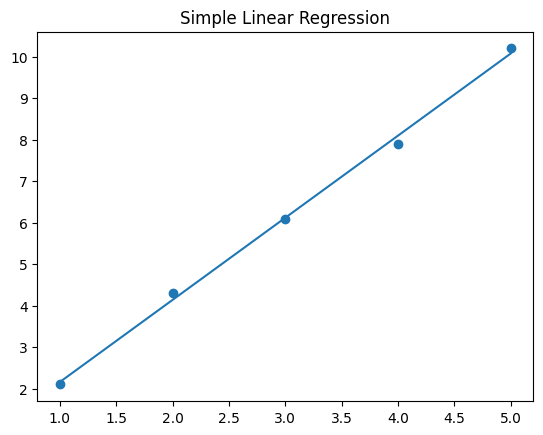

In [1]:
# Question 6: Simple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("Simple Linear Regression")
plt.show()


In [3]:
# Question 7: Multiple Linear Regression + VIF

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


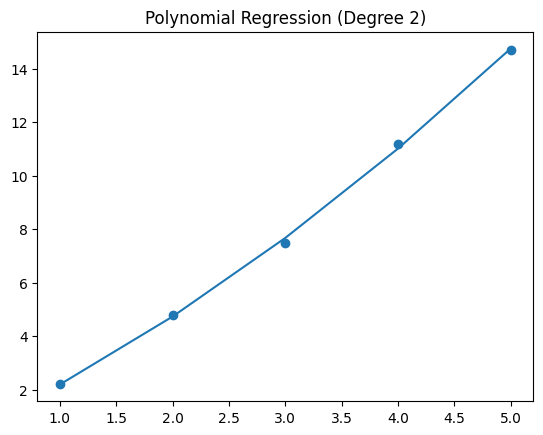

In [4]:
# Question 8: Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("Polynomial Regression (Degree 2)")
plt.show()


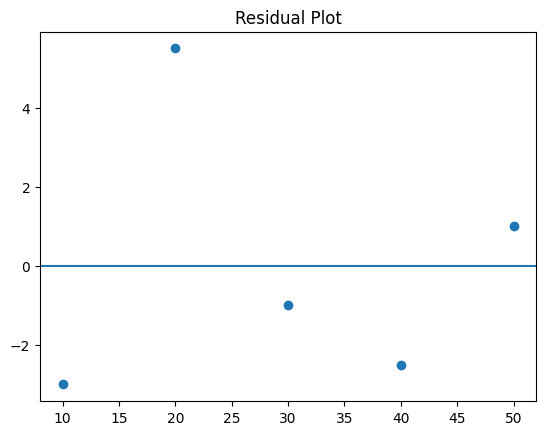

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
# Question 9: Residual Plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals)
plt.axhline(y=0)
plt.title("Residual Plot")
plt.show()

print("Residuals:", residuals)


### Question 10: Imagine you are a data scientist working for a real estate company.
You need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression model.
Explain the steps you would take to address these issues and ensure a robust model.

**Answer:**

**Step 1: Detect and Confirm Problems**
- Plot residuals vs predicted values to check for heteroscedasticity.
- Compute Variance Inflation Factor (VIF) and correlation matrix to detect multicollinearity.

**Step 2: Address Heteroscedasticity**
- Apply log transformation to the target variable (house prices) to stabilize variance.
- Use robust regression methods that reduce sensitivity to heteroscedasticity.
- Consider weighted least squares regression if variance changes systematically.

**Step 3: Address Multicollinearity**
- Remove or combine highly correlated features.
- Use feature selection methods (like backward elimination or Lasso regularization).
- Apply Ridge Regression or Lasso Regression to reduce the effect of multicollinearity.

**Step 4: Validate and Improve Model**
- Use cross-validation to check model generalization.
- Evaluate using R², RMSE, and MAE metrics.
- If needed, explore non-linear models (Decision Trees, Random Forest) to improve accuracy.

**Step 5: Ensure Robust Predictions**
- After adjustments, retrain the model and confirm residuals are randomly distributed.
- Ensure coefficients are interpretable and reliable for decision-making.

**Conclusion:**  
By following these steps, the regression model becomes robust, accurate, and reliable for predicting house prices in real-world scenarios.
